In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
pth = os.getcwd()
behdir = os.path.join(pth, 'pretests 01')
os.listdir(behdir)

['002_c.log',
 '002_c.xls',
 '003a_c.log',
 '003a_c.xls',
 '003_c.log',
 '003_c.xls',
 'readme.txt',
 'weibull_fit_temp.png']

In [5]:
df = pd.read_excel(os.path.join(behdir, '002_c.xls'))
df.head(4)

,time,fixTime,targetTime,SMI,maskTime,opacity,orientation,response,ifcorrect,RT
1,364.147851,81,1,2,20,1.0,90,f,1,1.012841
2,366.507634,75,1,2,20,1.0,135,j,1,0.711520
3,368.504335,81,1,2,20,1.0,135,j,1,0.692330
4,370.532309,138,1,2,20,0.9,90,j,0,0.938961


## Selecting relevant data
We need to select correct contrast range and take into account valid RT's.

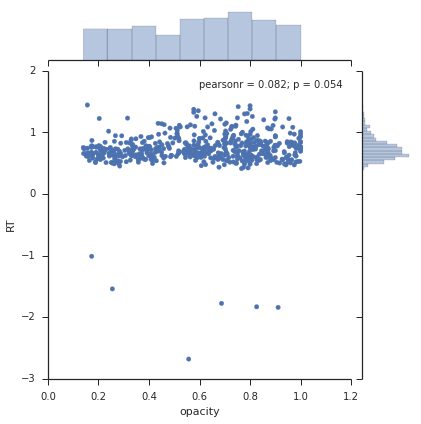

In [6]:
sns.set_style("ticks")
sns.jointplot("opacity", "RT", data=df)

**Whoops**, weibull fit did not work well...
We'll have to fix it

## fixing Weibull fitting

In [7]:
from weibull import *

In [8]:
def fitw(df, ind):
    x = df.loc[ind, 'opacity']
    y = df.loc[ind, 'ifcorrect']
    w = Weibull(x, y)
    w.fit([1., 1.])
    return w

#### First - stepwise contrast
First let's just check how stepwise - that is first 35 trials works...

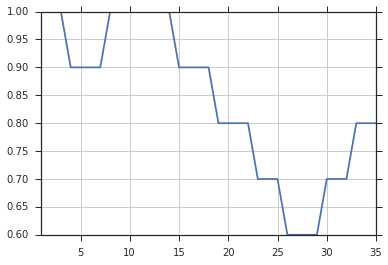

In [11]:
df.loc[1:35,'opacity'].plot()

### First weibull fit
First weibull fit is performed after 45 trials.  
But the rule of how many trials to take is:  
`min([i-15, 60])`  
where `i` is the current trial.

In [13]:
# trials 1 - 60
current_trial = 45
take_last = min([current_trial-15, 60])
idx = np.array(np.arange(current_trial-take_last+1, 
                         current_trial+1), dtype = 'int')
idx

array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

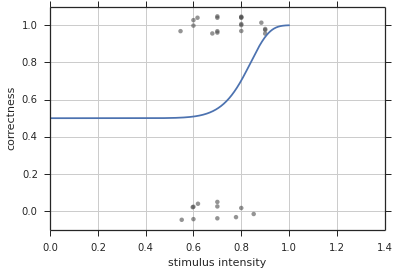

In [16]:
w = fitw(df, idx)
w.plot()

In [17]:
# This looks ok and it also looks good in the logs
# But the Weibull slowly starts to lay flat:
logs = '''
528.6190 	WARNING 	Weibull params:  18.7963480413 0.841270001797
528.6190 	WARNING 	Contrast limits set to:  0.76103515625 - 0.87978515625
578.5423 	WARNING 	Weibull params:  9.22088411376 0.782814143805
578.5423 	WARNING 	Contrast limits set to:  0.63818359375 - 0.85771484375
621.1924 	WARNING 	Weibull params:  8.15590745724 0.786164566541
621.1924 	WARNING 	Contrast limits set to:  0.6240234375 - 0.8716796875
657.7038 	WARNING 	Weibull params:  4.11669179003 0.904373296702
657.7038 	WARNING 	Contrast limits set to:  0.572265625 - 1.109765625
657.7038 	WARNING 	Opacity limits corrected to:  0.572265625 - 1.0
691.8962 	WARNING 	Weibull params:  2.8046422685 1.00986429453
691.8962 	WARNING 	Contrast limits set to:  0.51591796875 - 1.363671875
691.8962 	WARNING 	Opacity limits corrected to:  0.51591796875 - 1.0
729.0445 	WARNING 	Weibull params:  1.10431671132 0.767949774827
729.0445 	WARNING 	Contrast limits set to:  0.139453125 - 1.64677734375
729.0445 	WARNING 	Opacity limits corrected to:  0.139453125 - 1.0
'''

# the params now seem to be different though...
w.params

array([ 11.72454782,   0.81984332])

In [27]:
def idx_at(fit_num):
    current_trial = 45 + (fit_num-1)*10
    take_last = min([current_trial-15, 60])
    idx = np.array(np.arange(current_trial-take_last+1, 
                             current_trial+1), dtype = 'int')
    return idx

def wfit_at(df, fit_num):
    idx = idx_at(fit_num)
    return fitw(df, idx)

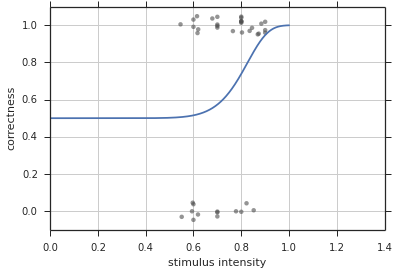

In [21]:
# let's look at weibull fit no. 2
w = wfit_at(df, 2)
w.plot()

array([ 11.18171312,   0.80619885])

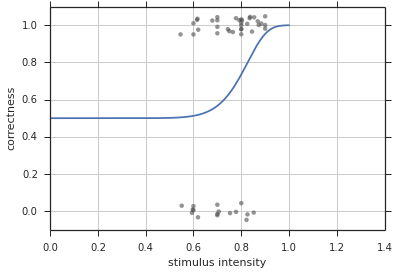

In [23]:
# 2 looks ok, what about 3?
w = wfit_at(df, 3)
w.plot()
w.params

#### Fit 4

array([ 6.84316408,  0.8133825 ])

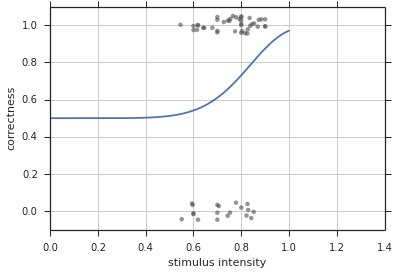

In [24]:
w = wfit_at(df, 4)
w.plot()
w.params

#### Fit 5

array([ 7.38745215,  0.85943552])

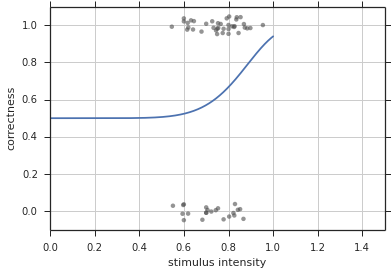

In [25]:
w = wfit_at(df, 5)
w.plot()
w.params

#### Fit 6

array([ 2.47083899,  0.94887513])

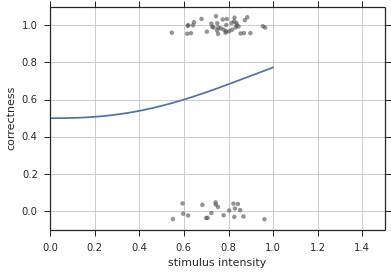

In [26]:
w = wfit_at(df, 6)
w.plot()
w.params

In [30]:
# This is not so good, seems like not enough incorr trials?
idx = idx_at(6)
df.loc[idx, 'ifcorrect'].mean()

0.66666666666666663

array([ 2.48650956,  0.94303081])

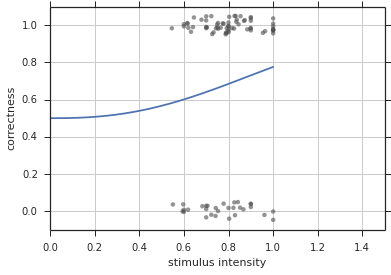

In [33]:
# Let's compare to all trials:
idx2 = np.r_[1:idx[-1]]
w = fitw(df, idx2)
w.plot()
w.params

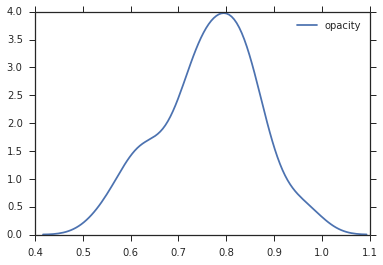

In [34]:
# Maybe not necessarily too little incorr, but contrast unequally probed...
sns.kdeplot(df.loc[idx, 'opacity'])

### Looking at later trials (after Weibull fit, the actual proc)

array([ 1.93101974,  0.90579841])

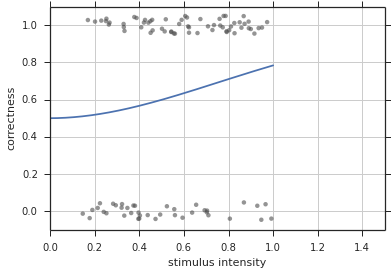

In [35]:
idx = np.r_[100:200]
w = fitw(df, idx)
w.plot()
w.params

array([  1.55141445e-02,   2.85068413e+04])

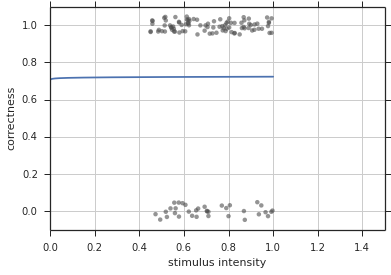

In [41]:
idx = np.r_[100:300]
idxT, = np.where(df.loc[idx, 'opacity'] > 0.45)
w = fitw(df, idx[idxT])
w.plot()
w.params

In [42]:
df.loc[100:105,]

,time,fixTime,targetTime,SMI,maskTime,opacity,orientation,response,ifcorrect,RT
100,726.506361,173,1,2,20,0.763,135,j,1,0.784151
101,732.497013,128,1,2,20,0.524,135,f,0,1.089189
102,735.398274,81,1,2,20,0.735,0,f,1,0.953542
103,737.691453,209,1,2,20,0.330,0,f,1,0.893350
104,741.201438,92,1,2,20,0.929,45,f,0,1.088124
105,743.744211,171,1,2,20,0.811,90,f,1,1.052405


array([ 1.06657827,  0.91495178])

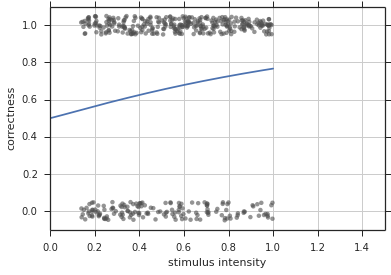

In [44]:
idx = np.r_[100:560]
w = fitw(df, idx)
w.plot()
w.params

array([ 0.90620129,  0.95343995])

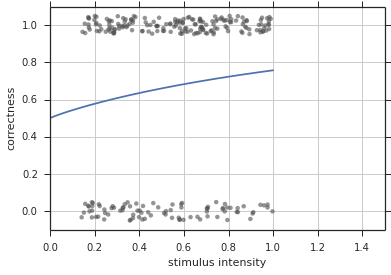

In [45]:
idx = np.r_[300:560]
w = fitw(df, idx)
w.plot()
w.params

array([ 1.37599749,  0.98016654])

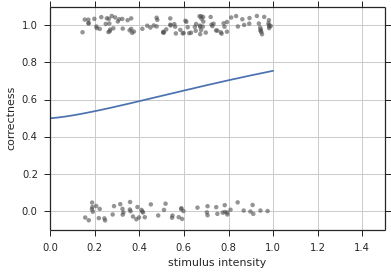

In [46]:
idx = np.r_[400:560]
w = fitw(df, idx)
w.plot()
w.params